# Logistic Regression

This exercise will solve two exercises involving Logistic Regression. 

In the first one, we will train a model to predict if a student gets admitted into a university based on the results of two exams. On the second one, we will predict wheter microchips from a fabrication plant passes quality assurance based on two test results. In this case, we will use a regularized logistic regression.

# Non Regularized Logistic Regression

The data contain three columns: the first and the second will create the X matrix and the third the Y matrix.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('ex2data1.txt', sep=",", names=['Exam_1', 'Exam_2', 'admission'])
data.head()

,Exam_1,Exam_2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


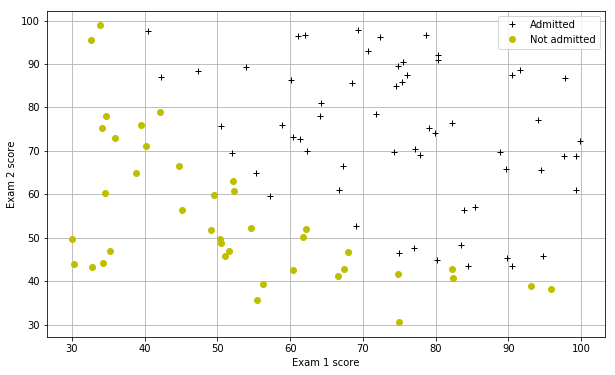

In [2]:
def plotData(pos, neg):
    plt.figure(figsize=(10,6))
    plt.plot(pos['Exam_1'],pos['Exam_2'],'k+',label='Admitted')
    plt.plot(neg['Exam_1'],neg['Exam_2'],'yo',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)

pos = data[data['admission'] == 1][['Exam_1', 'Exam_2']]
neg = data[data['admission'] == 0][['Exam_1', 'Exam_2']]

plotData(pos, neg)

In using sklearn, the default is passing a C parameter (that is 1/lambda, the parameter of regularization). To remove regularization, we simply define C as a big value (when lambda is 0, C tends to infinite)

In [3]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1e49)

In [4]:
x = np.array(data[['Exam_1', 'Exam_2']])
y = np.array(data[['admission']])
y = np.squeeze(y)

lr.fit(x, y)

/mnt/c/Users/Luiz Nonenmacher/python-environments/bi_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e+49, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
theta0 = lr.intercept_[0]
theta1 = lr.coef_[:,0][0]
theta2 = lr.coef_[:,1][0]

print('Theta 0 is {}, Theta 1 is {} and Theta 2 is {}'.format(theta0, theta1, theta2))
print('The prediction accuracy is {} %'.format(lr.score(x,y) * 100))


Theta 0 is -24.95604647382152, Theta 1 is 0.20459007943984908 and Theta 2 is 0.1998100873957382
The prediction accuracy is 89.0 %


In [6]:
student_1 = np.array([45, 85]).reshape(1,2)
prediction1 = round(lr.predict_proba(student_1)[0][1] * 100, 2)
print('For a student with scores 45 and 85, we predict an admission probability of {} %'.format(prediction1))

For a student with scores 45 and 85, we predict an admission probability of 77.46 %


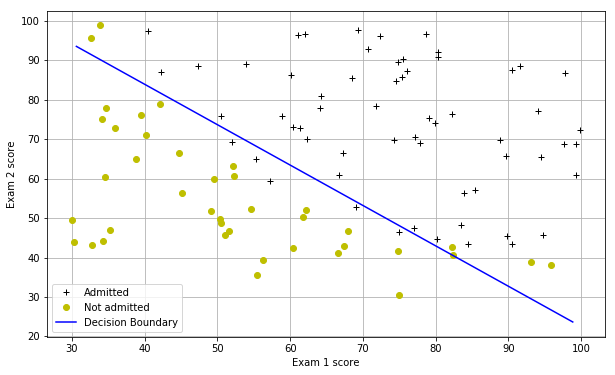

In [7]:
x1 = np.linspace(30,100, 1)
x2 = np.linspace(30,100, 1)
yy = []

boundary_xs = np.array([np.min(x[:,1]), np.max(x[:,1])])
boundary_ys = (-1./theta2)*(theta0 + theta1*boundary_xs)
plotData(pos, neg)
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()
plt.show()

# Regularized Logistic Regression

The data contain three columns: the first and the second will create the X matrix and the third the Y matrix.

In [8]:
data = pd.read_csv('ex2data2.txt', sep=",", names=['Test_1', 'Test_2', 'approval'])
data.head()

,Test_1,Test_2,approval
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


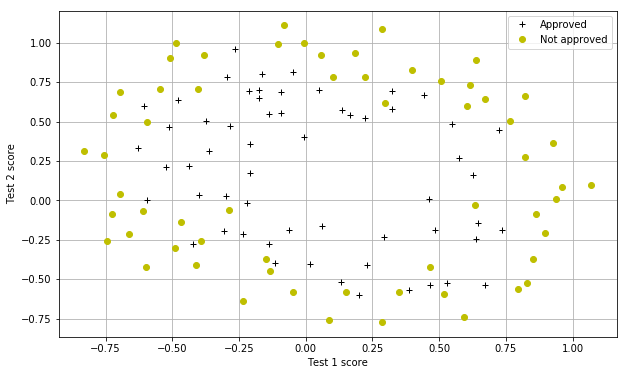

In [9]:
pos = data[data['approval'] == 1][['Test_1', 'Test_2']]
neg = data[data['approval'] == 0][['Test_1', 'Test_2']]

plt.figure(figsize=(10,6))
plt.plot(pos['Test_1'],pos['Test_2'],'k+',label='Approved')
plt.plot(neg['Test_1'],neg['Test_2'],'yo',label='Not approved')
plt.xlabel('Test 1 score')
plt.ylabel('Test 2 score')
plt.legend()
plt.grid(True)

As we see in the figure, the data are not linearly separable, so we will need to use a regularized logistic regression with more features. We will first create more features to contain the combinations of test_1^n * test_2^n for n from 0 to 6.

After, we will test three values of lambda: 0 (C = 1e49), 1 (C = 1), and 100 (C = 0.01).

In [10]:
def create_features(df):
    for i in range(0,7):
        for j in range(0,i+1):
            name = str(i-j) + '-' + str(j)
            df[name] = (df['Test_1'] ** (i-j)) * (df['Test_2'] ** j)
    return df

data = create_features(data)  
data.head()

,Test_1,Test_2,approval,0-0,1-0,0-1,2-0,1-1,0-2,3-0,...,2-3,1-4,0-5,6-0,5-1,4-2,3-3,2-4,1-5,0-6
0,0.051267,0.69956,1,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,-0.092742,0.68494,1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,-0.213710,0.69225,1,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,-0.375000,0.50219,1,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,-0.513250,0.46564,1,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [11]:
data.columns

Index(['Test_1', 'Test_2', 'approval', '0-0', '1-0', '0-1', '2-0', '1-1',
       '0-2', '3-0', '2-1', '1-2', '0-3', '4-0', '3-1', '2-2', '1-3', '0-4',
       '5-0', '4-1', '3-2', '2-3', '1-4', '0-5', '6-0', '5-1', '4-2', '3-3',
       '2-4', '1-5', '0-6'],
      dtype='object')

In [12]:
columns = ['0-0', '1-0', '0-1', '2-0', '1-1', '0-2', '3-0', '2-1', '1-2', '0-3', '4-0', '3-1', '2-2', 
           '1-3', '0-4', '5-0', '4-1', '3-2', '2-3', '1-4', '0-5', '6-0', '5-1', '4-2', '3-3', '2-4', 
           '1-5', '0-6']

x = np.array(data[columns])
y = np.array(data[['approval']])
y = np.squeeze(y)

In [13]:
c = 1
lr2 = LogisticRegression(C=c, solver='liblinear')
lr2.fit(x, y)

print('With a c value of {}, the prediction accuracy is {} %'.format(c, round(lr2.score(x,y) * 100,2)))

With a c value of 1, the prediction accuracy is 83.05 %


Now, we will test for different values of regularization (0.01, 1, and 1e49). Smaller values tend to underfit the data and bigger values tend to overfit it. This should be apparent by looking at the graphs.

In [14]:
def new_feature(array, degree):
    transformed_array = array
    for i in range(0,degree+1):
        for j in range(0, i + 1):
            new_value = (array[0,0] ** (i-j) * array[0,1] ** j).reshape(1,-1)
            transformed_array = np.concatenate((transformed_array,new_value), axis=1)
    transformed_array = transformed_array[:,2:]
    return transformed_array

In [19]:
def plot_countour():
    test1 = np.linspace(-1, 1, 250)
    test2 = np.linspace(-1, 1, 250)
    z = np.empty((250,250))

    for i in range(len(test1)):
        for j in range(len(test2)):
            array = np.array([test1[i], test2[j]]).reshape(1,-1)
            new_array = new_feature(array, 6)
            z[i][j] = (new_array @ lr2.coef_.T) + lr2.intercept_

    xx,yy = np.meshgrid(test1,test2)

    plt.figure(figsize=(10,6))
    plt.plot(pos['Test_1'],pos['Test_2'],'k+',label='Approved')
    plt.plot(neg['Test_1'],neg['Test_2'],'yo',label='Not approved')
    plt.contour(xx,yy,z > 0,cmap=plt.cm.Paired, alpha=0.8)
    plt.xlabel('Test 1 score')
    plt.ylabel('Test 2 score')
    plt.title('c = {} (prediction accuracy of {} %)'.format(c, round(lr2.score(x,y) * 100,2)), fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

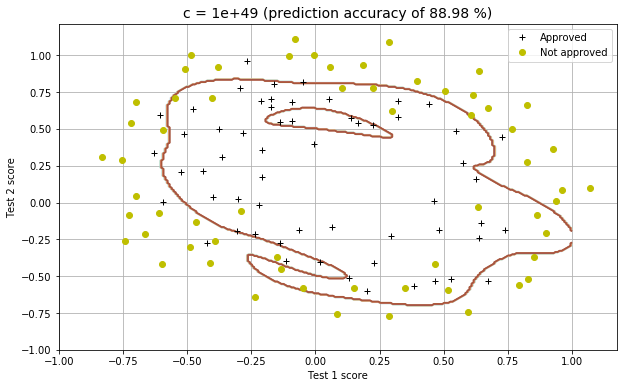

In [20]:
c = 1e49
lr2 = LogisticRegression(C=c, solver='liblinear')
lr2.fit(x, y)
plot_countour()

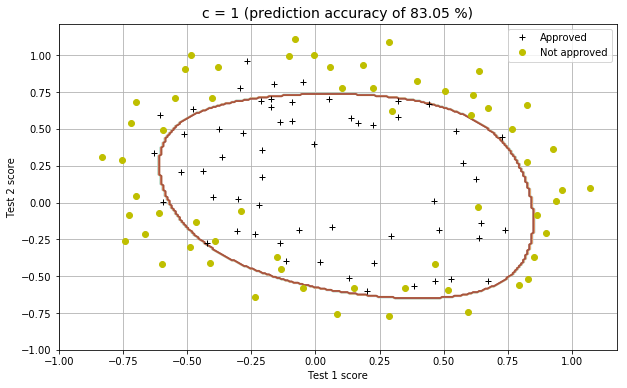

In [21]:
c = 1
lr2 = LogisticRegression(C=c, solver='liblinear')
lr2.fit(x, y)
plot_countour()

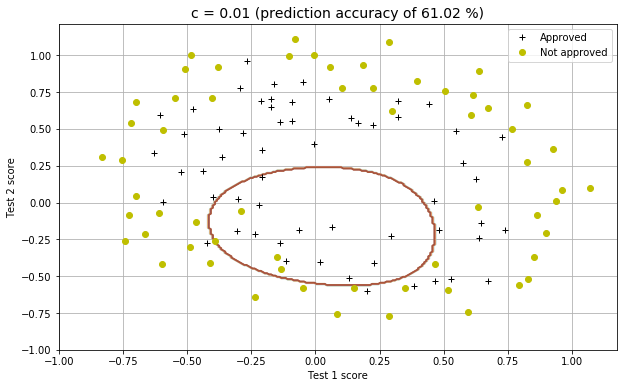

In [22]:
c = 0.01
lr2 = LogisticRegression(C=c, solver='liblinear')
lr2.fit(x, y)
plot_countour()